# PCA.
A análise de componentes principais pode ser dividida em cinco etapas, vai ser passado cada etapa, fornecendo explicações lógicas 
sobre o PCA está fazendo e simplificando o conceito matemáticos, como padronização, covariância, vetores própios e valores própios.
* Padronizar a gama de variáveis iniciais contínuas.
* Calcular a matriz de covariância para identificar correlações.
* Calcular os autovetores e autovalores da matriz de covariância para indentificar os componentes principais.
* Criar um vetor de recursos para decidir quais componentes principais manter.
* Reformar os dados ao longo dos eixos dos componentes principais.

## Padronização.
Matemáticamente, isso pode ser feito subtraindo a média e dividindo pelo desvio padrão para cada valor de cada variável.
$$z = \frac{value-mean}{standarddeviation}$$
Desta forma todas as variáveis serão transformadas na mesma escala.

## Cálculo da matriz de covariâcia.
O objetivo desta etapa é entender como as variáveis ​​do conjunto de dados de entrada estão variando da média entre si, ou seja, verificar se existe alguma relação entre elas, porque às vezes as variáveis ​​são altamente correlacionadas de forma que contém informações redundantes.

![img](https://cdn.builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/national/Principal%2520Component%2520Analysis%2520Covariance%2520Matrix.png)

Como a covariância de uma variável  consigo mesma é sua variância, e como a covariância é comutativa então temos a matriz triangular superior e a inferior serão iguais, desse modo podemos notar mais possiveis erros.

O que as covariâncias que temos como entradas da matriz nos dizem sobre as correlações entre as variáveis?
Na verdade, é o sinal da covariância que importa.
* Se possitivo, então: as duas variáveis aumentam ou diminuem juntas(correlacionadas).
* Se negativo, então: um aumenta quando o outro diminui(inversamente correlacionado).


## Calcular os vetores própios e os valores próprios da matriz de covariância para indentificar os componentes principais.
Autovetores e autovalores são os conceitos de álgebra linear que precisamos calcular a partir da matriz de covariância para determinar os componentes principais dos dados. Antes de chegar à explicar desses conceitos.
$\newline$ Os componentes principais são novas variáveis contruidas como combinação lineares ou misturadas das variáveis iniciais. Essas combinações são feitas de forma que as novas variáveis não estejam correlacionadas e a maioria das informalções dentro das variáveis iniciais seja comprimida nos primeiros componentes, ou seja, a ideia que dados 10 dimensionas forneçam 10 componentes principais, mas o PCA tenta colocar o máximo de informações possiveis no primeiro componente, e depois o máximo de informações restantes no segundo e assim por diante.

## Vetor de recurso.
Como vimos na etapa anterior, computar os autovetores e ordená-los por seus autovalores em ordem decrescente nos permite encontrar os componentes principais em ordem de significância. Nesta etapa, o que fazemos é escolher entre manter todos esses componentes ou descartar aqueles de menor significância (de autovalores baixos), e formar com os restantes uma matriz de vetores que chamamos de  vetor de característica .

Portanto, o vetor de características é simplesmente uma matriz que tem como colunas os autovetores dos componentes que decidimos manter. Isso o torna o primeiro passo para a redução da dimensionalidade, porque se escolhermos manter apenas  p  autovetores (componentes) de  n , o conjunto de dados final terá apenas  p  dimensões.

## Reformule os dados ao longo dos eixos dos componentes principais.
Nesta etapa, que é a última, o objetivo é usar o vetor de características formado a partir dos autovetores da matriz de covariância, para reorientar os dados dos eixos originais para aqueles representados pelos componentes principais (daí o nome Análise de Componentes Principais ) Isso pode ser feito multiplicando a transposição do conjunto de dados original pela transposição do vetor de características.
$$finalDataSet = FeatureVector^T \cdot StandardizedOriginalDataSet$$

In [1]:
import numpy as np
import pandas_datareader.data as web
import matplotlib.pyplot as fig
from datetime import datetime as dt
import seaborn as sns

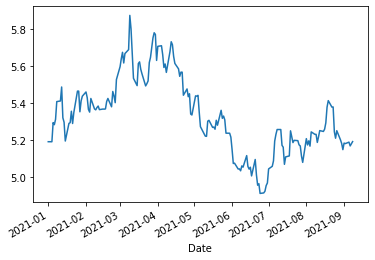

In [2]:
dt_inicio = '2021-01-01'
hoje = f'{dt.today().year}-{dt.today().month}-{dt.today().day}'
dt_final = hoje

usd = web.DataReader('USDBRL=X', data_source='yahoo', start=dt_inicio, end=dt_final)
usd['Close'].plot()
fig.show()

In [3]:
usd

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,5.199149,5.191600,5.1921,5.1921,0,5.1921
2021-01-04,5.252800,5.116400,5.1728,5.1919,0,5.1919
2021-01-05,5.350300,5.274600,5.2950,5.2953,0,5.2953
2021-01-06,5.346680,5.231207,5.2845,5.2841,0,5.2841
2021-01-07,5.405568,5.296700,5.3133,5.3129,0,5.3129
...,...,...,...,...,...,...
2021-09-01,5.197100,5.141200,5.1852,5.1846,0,5.1846
2021-09-02,5.189200,5.131100,5.1819,5.1818,0,5.1818
2021-09-05,5.208700,5.154700,5.1925,5.1898,0,5.1898


In [8]:
data = np.asanyarray(usd)
data

array([[5.19914913, 5.19159985, 5.19210005, 5.19210005, 0.        ,
        5.19210005],
       [5.25279999, 5.11639977, 5.17280006, 5.19189978, 0.        ,
        5.19189978],
       [5.35029984, 5.27460003, 5.29500008, 5.29530001, 0.        ,
        5.29530001],
       ...,
       [5.20870018, 5.1546998 , 5.19250011, 5.18979979, 0.        ,
        5.18979979],
       [5.16989994, 5.16694689, 5.16909981, 5.16930008, 0.        ,
        5.16930008],
       [5.19269991, 5.19269991, 5.19269991, 5.19269991, 0.        ,
        5.19269991]])

In [9]:
np.cov(np.transpose(data))

array([[0.04375654, 0.04188937, 0.04306754, 0.04300679, 0.        ,
        0.04300679],
       [0.04188937, 0.04094195, 0.04172018, 0.04163416, 0.        ,
        0.04163416],
       [0.04306754, 0.04172018, 0.04341915, 0.04333691, 0.        ,
        0.04333691],
       [0.04300679, 0.04163416, 0.04333691, 0.04327897, 0.        ,
        0.04327897],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.04300679, 0.04163416, 0.04333691, 0.04327897, 0.        ,
        0.04327897]])

In [10]:
cov_data = np.cov(np.transpose(data))
import numpy.linalg as la
w,v = la.eig(cov_data) ## obetem autovalores e autovetores.
w

array([2.13335198e-01, 8.92418077e-04, 4.32550682e-04, 1.54275556e-05,
       0.00000000e+00, 0.00000000e+00])

* A função numpy.linalg.eig retorna dois valores: um vetor de autovalores w (não necessariamente ordenados )
* na análise PCA, os maiores  autovalores correspodem aos componentes principais componetes principais mais importantes ou, em outras palavras, os dados sofrem maior variação.
Por isso o primeiro passo é a ordenação dos autovalores e seus autovetores correspondentes em ordem decrescente.

In [11]:
ind = np.argsort(w)[::-1] ## obtem indices para a ordenação decrescente dos autovetores
w_dec = w[ind]
w_dec

array([2.13335198e-01, 8.92418077e-04, 4.32550682e-04, 1.54275556e-05,
       0.00000000e+00, 0.00000000e+00])

In [12]:
la.norm(w[0])

0.2133351977275541

* Representando autovalores da matriz covariâncias


In [13]:
EVR = w/sum(w)
EVR

array([9.93756177e-01, 4.15705419e-03, 2.01490385e-03, 7.18645064e-05,
       0.00000000e+00, 0.00000000e+00])

In [14]:
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(data)
PCA(copy=True, n_components=None, whiten=False)
pca.components_

array([[ 4.50165657e-01,  4.35657819e-01,  4.50500774e-01,
         4.49778945e-01,  0.00000000e+00,  4.49778945e-01],
       [ 6.25012123e-01,  4.69667104e-01, -3.54599625e-01,
        -3.62651184e-01,  0.00000000e+00, -3.62651184e-01],
       [ 6.37391530e-01, -7.67113507e-01,  2.49258759e-03,
         5.12966523e-02, -0.00000000e+00,  5.12966523e-02],
       [-2.10419852e-02,  3.39402951e-02, -8.19330181e-01,
         4.04415223e-01, -0.00000000e+00,  4.04415223e-01],
       [-0.00000000e+00, -1.65421691e-16,  1.85905162e-15,
         7.07106781e-01,  0.00000000e+00, -7.07106781e-01],
       [-0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -1.00000000e+00, -0.00000000e+00]])